<a href="https://colab.research.google.com/github/2303A52189/objectdetection/blob/main/gen_ai_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics gtts IPython


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.5/983.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
 

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Saving WhatsApp Image 2025-03-24 at 09.07.57_6eb5de48.jpg to WhatsApp Image 2025-03-24 at 09.07.57_6eb5de48.jpg


100%|██████████| 6.25M/6.25M [00:00<00:00, 132MB/s]



image 1/1 /content/WhatsApp Image 2025-03-24 at 09.07.57_6eb5de48.jpg: 640x512 2 persons, 499.8ms
Speed: 17.5ms preprocess, 499.8ms inference, 37.1ms postprocess per image at shape (1, 3, 640, 512)


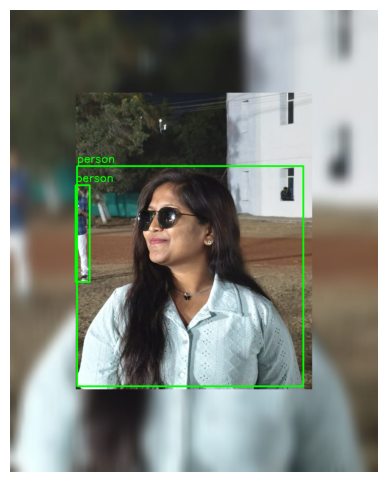

Detected objects are: person


In [ ]:
import torch
import cv2
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
from ultralytics import YOLO
from gtts import gTTS
import IPython.display as ipd

# Step 1: Upload Image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Step 2: Load the YOLOv8 Model
model = YOLO('yolov8n.pt')  # Using YOLOv8 nano model (lightweight)

# Step 3: Perform Object Detection
results = model(image_path)

# Load Image using OpenCV
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 4: Draw Bounding Boxes and Labels
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
        class_id = int(box.cls[0])  # Class ID
        label = model.names[class_id]  # Object label

        # Draw Bounding Box
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 3)
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Step 5: Display Image with Detected Objects
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis("off")
plt.show()

# Step 6: Convert Object Names to Speech
detected_objects = list(set(model.names[int(box.cls[0])] for result in results for box in result.boxes))
if detected_objects:
    text_to_speak = "Detected objects are: " + ", ".join(detected_objects)
    print(text_to_speak)

    # Convert text to speech
    tts = gTTS(text_to_speak, lang="en")
    tts.save("output.mp3")

    # Play the generated audio
    ipd.display(ipd.Audio("output.mp3", autoplay=True))
else:
    print("No objects detected.")
